### Interactive Plot that Implement in Open Source Python the Sinclair, 1974 Method as Reported in Chiodini et al., 1998

Descrizione di funzione Sinclair - The Sinclair method is a statistical procedure by which is possible to partition a dataset of non gaussian polymodal values into two or more log-normal sub-populations starting from a cumulative probability plot of the data. The Sinclair method can be useful to separate the background population from the anomalous populations. In our procedure the data can vary in complexity and the code is able to manage from one to five populations. For each population it is possible to chose the mean, the standard deviation and the fraction with respect to the total of the data, in order to find the best combination of log-normal populations that fit the distribution of the raw data.

In [5]:
import pyco2stats as PyCO2
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the dataset
my_dataset = pd.read_excel('PYTHONSS.xlsx')
my_dataset = my_dataset.dropna(subset=['A'])

# Maximum number of populations we want to support
max_populations = 5

# Initial parameters
initial_population_count = 3
initial_meds = [2, 1.3, 1, 1.5, 2.2]
initial_stds = [0.7, 0.9, 0.45, 0.5, 0.8]
initial_fds = [0.3, 0.2, 0.5, 0.4, 0.3]

# Create interactive widgets for number of populations and their parameters
population_count_slider = widgets.IntSlider(value=initial_population_count, min=1, max=max_populations, step=1, description='Populations:')
meds_sliders = [widgets.FloatSlider(value=initial_meds[i], min=0.1, max=10.0, step=0.01, description=f'Med {i+1}:') for i in range(max_populations)]
stds_sliders = [widgets.FloatSlider(value=initial_stds[i], min=0.1, max=2.0, step=0.01, description=f'Std {i+1}:') for i in range(max_populations)]
fds_sliders = [widgets.FloatSlider(value=initial_fds[i], min=0.0, max=1.0, step=0.01, description=f'Fd {i+1}:') for i in range(max_populations)]

# Style the sliders for better appearance and increased spacing
for slider in meds_sliders + stds_sliders + fds_sliders:
    slider.style.handle_color = 'lightblue'
    slider.layout.width = '300px'
    slider.layout.margin = '35px 0'  # Adding vertical margin to avoid overlap

# Create an output widget to capture the plot
output = widgets.Output()

# Function to update the visibility of parameter sliders
def update_slider_visibility(population_count):
    for i in range(max_populations):
        if i < population_count:
            meds_sliders[i].layout.display = 'block'
            stds_sliders[i].layout.display = 'block'
            fds_sliders[i].layout.display = 'block'
        else:
            meds_sliders[i].layout.display = 'none'
            stds_sliders[i].layout.display = 'none'
            fds_sliders[i].layout.display = 'none'

# Function to update the plot based on the widget values
def update_plot(*args):
    with output:
        # Clear the output before plotting new graph
        clear_output(wait=True)
        
        # Get the current values from the sliders
        population_count = population_count_slider.value
        meds = [slider.value for slider in meds_sliders[:population_count]]
        stds = [slider.value for slider in stds_sliders[:population_count]]
        fds = [slider.value for slider in fds_sliders[:population_count]]
        
        # Normalize fds so they sum to 1
        fds_sum = sum(fds)
        if fds_sum != 0:
            fds = [fd / fds_sum for fd in fds]
        
        # Create the figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
        
        # Plot raw data with improved style
        PyCO2.Visualize.pp_raw_data(my_dataset.A, marker='o', ax=ax, s=20, c='#FF5733', alpha=0.7, label='Raw Data')
        
        # Plot combined population with enhanced styling
        PyCO2.Visualize.pp_combined_population(meds, stds, fds, mminy=-1, mmaxy=4, ax=ax, linestyle='-', linewidth=3, color='#3498DB', label='Combined Population')

        # Plot combined population with enhanced styling
        PyCO2.Visualize.pp_single_populations(meds, stds, mminy=-1, mmaxy=4, ax=ax, linestyle='--', linewidth=1)
        
        # Plot percentiles
        PyCO2.Visualize.pp_add_percentiles(ax=ax, percentiles='full', linestyle='-.', linewidth=1, color='#2ECC71')
        
        # Adding titles and labels
        ax.set_title('Interactive Population Plot', fontsize=16)
        ax.set_xlabel('Data Points', fontsize=14)
        ax.set_ylabel('Values', fontsize=14)
        
        # Adding legend and grid
        ax.legend(loc='best', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Show the plot
        plt.show()

# Connect the update functions to the widgets
population_count_slider.observe(lambda change: update_slider_visibility(change['new']), names='value')
population_count_slider.observe(update_plot, names='value')

for slider in meds_sliders + stds_sliders + fds_sliders:
    slider.observe(update_plot, names='value')

# Layout the widgets using HBox and VBox
parameter_widgets = []
for i in range(max_populations):
    row = widgets.HBox([meds_sliders[i], stds_sliders[i], fds_sliders[i]])
    parameter_widgets.append(row)

# Combine the widgets into a VBox for better layout
widgets_box = widgets.VBox([population_count_slider] + parameter_widgets, layout=widgets.Layout(margin='10px 0'))

# Display the widgets and the output cell for the plot
display(widgets_box)
display(output)  # Show the output widget

# Initialize slider visibility and plot
update_slider_visibility(initial_population_count)
update_plot()  # Initial plot rendering


Output()

### Attempting to solve the problem by Gaussian Mixtures Models (GMM) - forced to 3 components (not in the library yet)
Gaussian Mixture Models (GMM) - Gaussian Mixture Models is a probabilistic method by which sub-populations can be obtained from an overall population. Formally, a mixture model corresponds to the mixture distribution representing the probability distribution of the observations in the overall population. In particular, it used to provide information on the properties of sub-populations by having only the observation on the aggregate population without any information on the identity of the aggregate population.

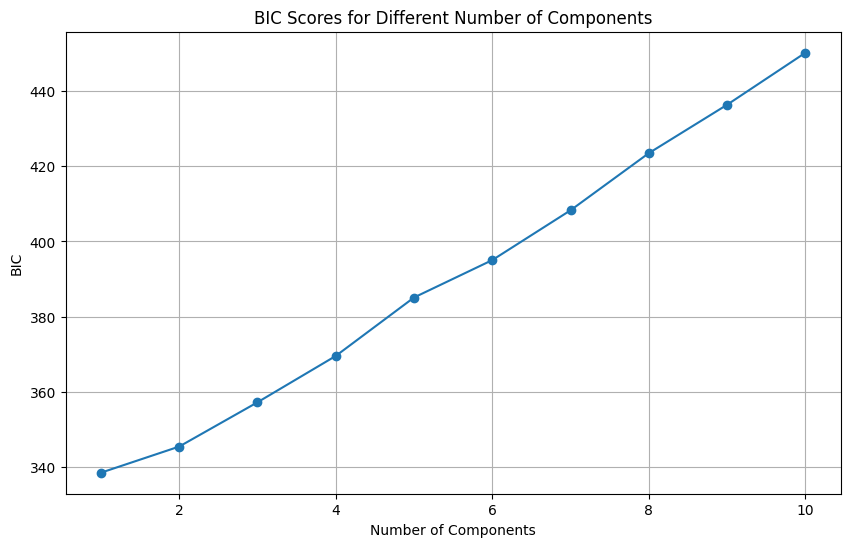

Optimal number of components: 3
Gaussian Mixture Model Parameters:
   Component      Mean  Covariance
0          1  0.419716    0.147565
1          2  2.266157    0.261563
2          3  1.156238    0.099252


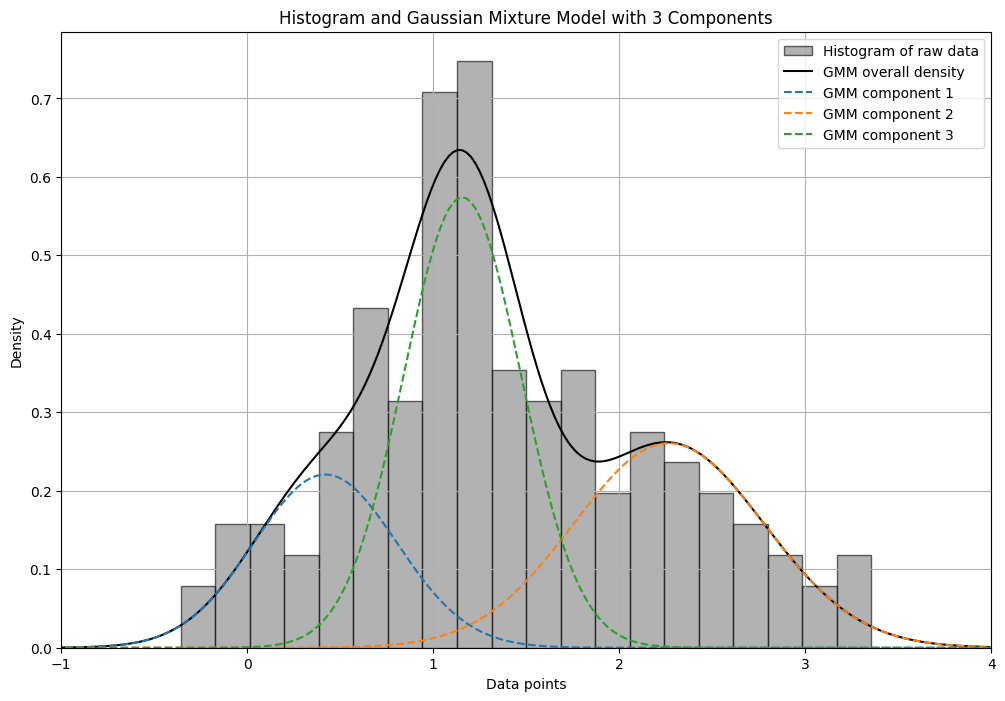

Means: [0.41971622 2.26615703 1.15623786]
Standard Deviations: [0.38414127 0.51143185 0.31504232]
Weights: [0.21252032 0.33415707 0.45332261]


In [6]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd

# Data: Replace this with your actual data array
data = my_dataset.A.values.reshape(-1, 1)

# Determine the optimal number of components using BIC
n_components = np.arange(1, 11)
bics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=0, covariance_type='spherical')
    gmm.fit(data)
    bics.append(gmm.bic(data))

# Plot BIC scores to visualize the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, marker='o')
plt.title('BIC Scores for Different Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.grid()
plt.show()

# Optimal number of components
optimal_n_components = 3 # n_components[np.argmin(bics)]
print(f'Optimal number of components: {optimal_n_components}')

# Fit the Gaussian Mixture Model with the optimal number of components
optimal_gmm = GaussianMixture(n_components=optimal_n_components, random_state=0, covariance_type='spherical')
optimal_gmm.fit(data)

# Predict the component for each data point
labels = optimal_gmm.predict(data)



# Display GMM means and covariances
gmm_means = optimal_gmm.means_
gmm_covariances = optimal_gmm.covariances_

gmm_params = pd.DataFrame({
    'Component': range(1, optimal_n_components + 1),
    'Mean': gmm_means.flatten(),
    'Covariance': gmm_covariances.flatten()
})

print("Gaussian Mixture Model Parameters:")
print(gmm_params)

# Histogram and GMM components overlay
x = np.linspace(min(data) - 10, max(data) + 10, 1000).reshape(-1, 1)

# Calculate the GMM densities
logprob = optimal_gmm.score_samples(x)
responsibilities = optimal_gmm.predict_proba(x)
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.figure(figsize=(12, 8))
plt.hist(data, bins=20, density=True, alpha=0.6, color='gray', edgecolor='black', label='Histogram of raw data')
plt.plot(x, pdf, '-k', label='GMM overall density')
for i in range(optimal_n_components):
    plt.plot(x, pdf_individual[:, i], '--', label=f'GMM component {i+1}')
plt.title(f'Histogram and Gaussian Mixture Model with {optimal_n_components} Components')
plt.xlabel('Data points')
plt.ylabel('Density')
plt.legend()
plt.xlim(-1,4)
plt.grid()
plt.show()

meds = optimal_gmm.means_
meds = meds.flatten()
print(f'Means: {meds}')

# Conver covariance into Standard Deviation
standard_deviations = np.sqrt(optimal_gmm.covariances_) 
stds = standard_deviations.flatten()
print(f'Standard Deviations: {stds}')

# Useful when plotting the distributions later
weights = optimal_gmm.weights_  
weights = weights.flatten()
print(f'Weights: {weights}')


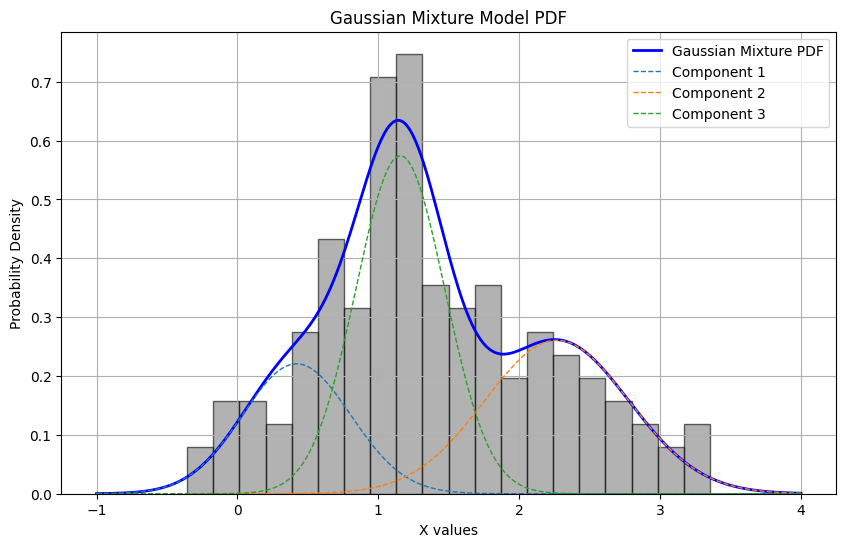

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Define the x values to evaluate the PDF
x = np.linspace(-1, 4, 500)

# Compute the Gaussian Mixture PDF
pdf = PyCO2.GMM.gaussian_mixture_pdf(x, meds, stds, weights)

fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size

pdf_plot_kwargs = {'color': 'blue', 'linewidth': 2}
component_plot_kwargs = {'linestyle': '--', 'linewidth': 1}
hist_plot_kwargs = {'alpha': 0.6, 'color': 'gray', 'edgecolor': 'black'}

PyCO2.Visualize.plot_gmm_pdf(ax, x, meds, stds, weights, data=data,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)


ax.set_title('Gaussian Mixture Model PDF')
ax.set_xlabel('X values')
ax.set_ylabel('Probability Density')
ax.grid()
ax.legend()
plt.show()

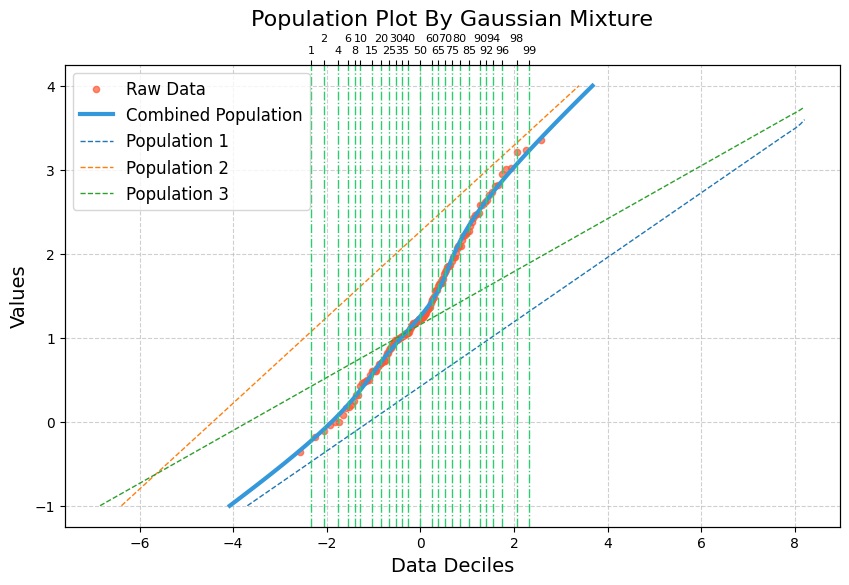

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
        
# Plot raw data with improved style
PyCO2.Visualize.pp_raw_data(my_dataset.A, marker='o', ax=ax, s=20, c='#FF5733', alpha=0.7, label='Raw Data')
        
# Plot combined population with enhanced styling
PyCO2.Visualize.pp_combined_population(meds, stds, weights, mminy=-1, mmaxy=4, ax=ax, linestyle='-', linewidth=3, color='#3498DB', label='Combined Population')

# Plot combined population with enhanced styling
PyCO2.Visualize.pp_single_populations(meds, stds, mminy=-1, mmaxy=4, ax=ax, linestyle='--', linewidth=1)
        
# Plot percentiles
PyCO2.Visualize.pp_add_percentiles(ax=ax, percentiles='full', linestyle='-.', linewidth=1, color='#2ECC71')
        
# Adding titles and labels
ax.set_title('Population Plot By Gaussian Mixture', fontsize=16)
ax.set_xlabel('Data Deciles', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
        
# Adding legend and grid
ax.legend(loc='best', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
        
# Show the plot
plt.show()


### Gaussian Mixture Model by Gradient Descent and Constained Vaues of the Components
This methodology is used to determine te maximum and minimum points of a function of several variables. Specifically, one goes in search of points that satisfy optimality conditions. Is an iterative method for the optimisation of differentiable functions. At each iteration, it repleaces the exact valueof the gradient of the function with an estimate obtained by evaluating the gradient only on a subset of the addends. This model shows the method to obtain the differentiation of the X population in a probability density function.

Epoch 0, Loss: 251.8898468017578
Epoch 200, Loss: 229.9545135498047
Epoch 400, Loss: 214.531494140625
Epoch 600, Loss: 201.18185424804688
Epoch 800, Loss: 189.63148498535156
Epoch 1000, Loss: 180.8685760498047
Epoch 1200, Loss: 174.7018280029297
Epoch 1400, Loss: 169.0565643310547
Epoch 1600, Loss: 164.4311065673828
Epoch 1800, Loss: 162.85736083984375
Epoch 2000, Loss: 162.1809539794922
Epoch 2200, Loss: 161.63340759277344
Epoch 2400, Loss: 160.42845153808594
Epoch 2600, Loss: 158.6201171875
Epoch 2800, Loss: 158.6103515625
Epoch 3000, Loss: 158.66539001464844
Epoch 3200, Loss: 158.7252197265625
Epoch 3400, Loss: 158.78329467773438
Epoch 3600, Loss: 158.83642578125
Epoch 3800, Loss: 158.88327026367188
Epoch 4000, Loss: 158.9233856201172
Epoch 4200, Loss: 158.95700073242188
Epoch 4400, Loss: 158.98464965820312
Epoch 4600, Loss: 159.00714111328125
Epoch 4800, Loss: 159.02511596679688

Optimized Means:
 [0.63421524 1.1639109  2.2222323 ]

Optimized Standard Deviations:
 [0.480338   0.286

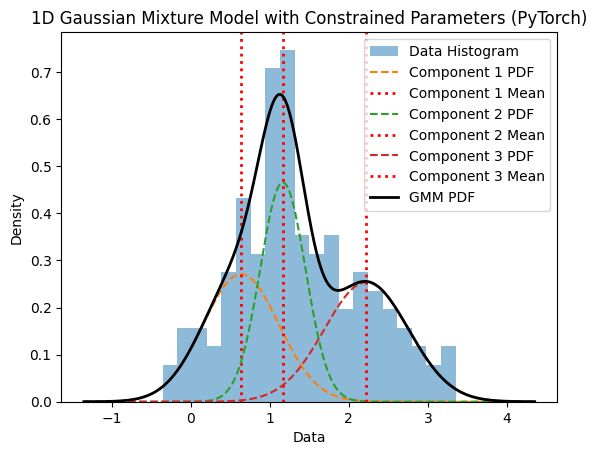

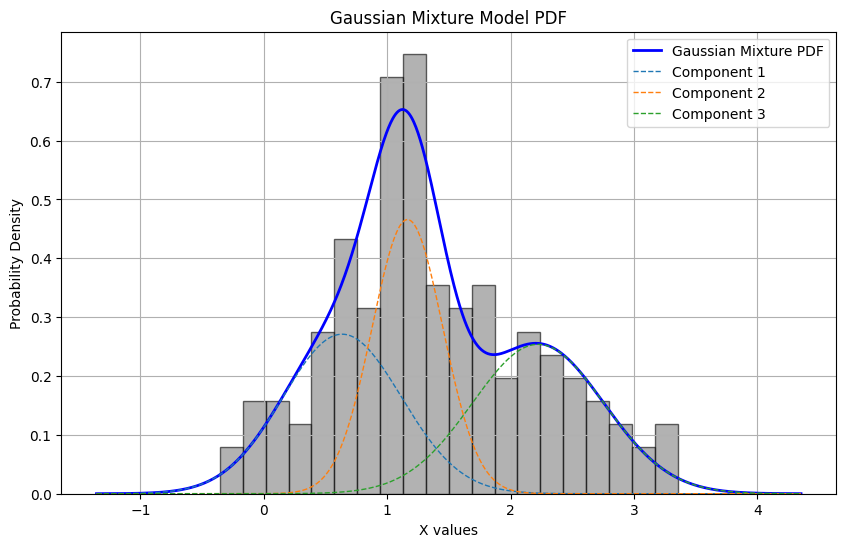

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example 1D data (replace this with your actual 1D data)
X = my_dataset.A

# Define the number of components
n_components=3

# Define constraints
mean_constraints = [(0.1, 2), (1, 3), (2, 4)]
std_constraints = [(0.1, 2.5), (0.1, 2.5), (0.1, 2.5)]
    
# Optimize GMM
optimized_means, optimized_stds, optimized_weights = PyCO2.GMM.constrained_gaussian_mixture(X, mean_constraints, std_constraints, n_components)
    
# Print the optimized parameters
print("\nOptimized Means:\n", optimized_means)
print("\nOptimized Standard Deviations:\n", optimized_stds)
print("\nOptimized Weights:\n", optimized_weights)

# Create a range of values for plotting
x_values = np.linspace(X.min() - 1, X.max() + 1, 1000)

# Plot the data histogram
plt.hist(X, bins=20, density=True, alpha=0.5, label='Data Histogram')

# Plot each Gaussian component using the norm.pdf function
for i in range(n_components):
    mean = optimized_means[i]
    std_dev = optimized_stds[i]
    weight = optimized_weights[i]
    
    # Calculate the Gaussian component's PDF
    component_pdf = weight * norm.pdf(x_values, loc=mean, scale=std_dev)
    
    # Plot the component's PDF
    plt.plot(x_values, component_pdf, '--', label=f'Component {i + 1} PDF')
    plt.axvline(mean, color='red', linestyle=':', linewidth=2, label=f'Component {i + 1} Mean')

# Plot the overall GMM PDF
overall_pdf = np.sum([optimized_weights[i] * norm.pdf(x_values, optimized_means[i], optimized_stds[i]) for i in range(n_components)], axis=0)
plt.plot(x_values, overall_pdf, '-k', label='GMM PDF', linewidth=2)

# Add plot details
plt.title('1D Gaussian Mixture Model with Constrained Parameters (PyTorch)')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size

pdf_plot_kwargs = {'color': 'blue', 'linewidth': 2}
component_plot_kwargs = {'linestyle': '--', 'linewidth': 1}
hist_plot_kwargs = {'alpha': 0.6, 'color': 'gray', 'edgecolor': 'black'}

PyCO2.Visualize.plot_gmm_pdf(ax, x_values, optimized_means, optimized_stds, optimized_weights, data=data,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)


ax.set_title('Gaussian Mixture Model PDF')
ax.set_xlabel('X values')
ax.set_ylabel('Probability Density')
ax.grid()
ax.legend()
plt.show()


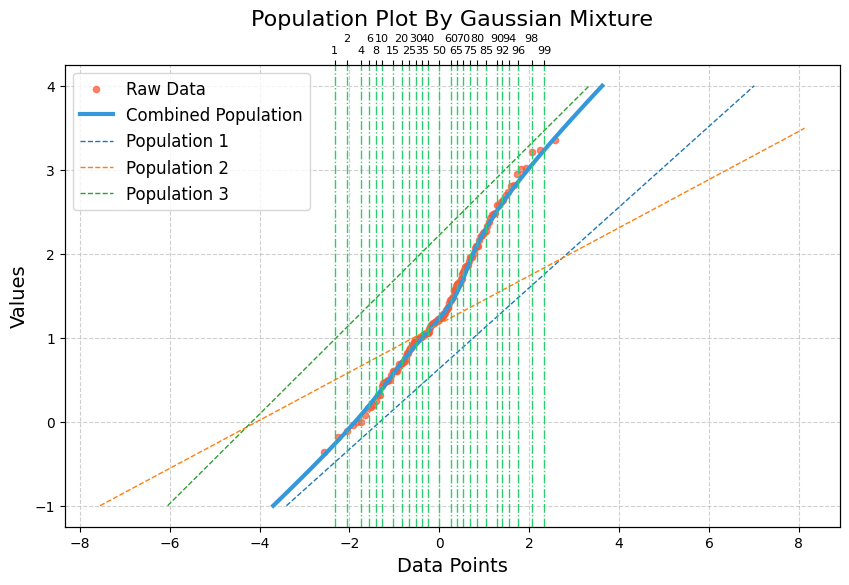

In [10]:
meds = optimized_means 
stds = optimized_stds 
weights = optimized_weights 

fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
        
# Plot raw data with improved style
PyCO2.Visualize.pp_raw_data(my_dataset.A, marker='o', ax=ax, s=20, c='#FF5733', alpha=0.7, label='Raw Data')
        
# Plot combined population with enhanced styling
PyCO2.Visualize.pp_combined_population(meds, stds, weights, mminy=-1, mmaxy=4, ax=ax, linestyle='-', linewidth=3, color='#3498DB', label='Combined Population')

# Plot combined population with enhanced styling
PyCO2.Visualize.pp_single_populations(meds, stds, mminy=-1, mmaxy=4, ax=ax, linestyle='--', linewidth=1)
        
# Plot percentiles
PyCO2.Visualize.pp_add_percentiles(ax=ax, percentiles='full', linestyle='-.', linewidth=1, color='#2ECC71')
        
# Adding titles and labels
ax.set_title('Population Plot By Gaussian Mixture', fontsize=16)
ax.set_xlabel('Data Points', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
        
# Adding legend and grid
ax.legend(loc='best', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
        
# Show the plot
plt.show()


### Error Propagation by Bootstrapping


Bootstrap iteration 1 out of 25 completed.
Bootstrap iteration 2 out of 25 completed.
Bootstrap iteration 3 out of 25 completed.
Bootstrap iteration 4 out of 25 completed.
Bootstrap iteration 5 out of 25 completed.
Bootstrap iteration 6 out of 25 completed.
Bootstrap iteration 7 out of 25 completed.
Bootstrap iteration 8 out of 25 completed.
Bootstrap iteration 9 out of 25 completed.
Bootstrap iteration 10 out of 25 completed.
Bootstrap iteration 11 out of 25 completed.
Bootstrap iteration 12 out of 25 completed.
Bootstrap iteration 13 out of 25 completed.
Bootstrap iteration 14 out of 25 completed.
Bootstrap iteration 15 out of 25 completed.
Bootstrap iteration 16 out of 25 completed.
Bootstrap iteration 17 out of 25 completed.
Bootstrap iteration 18 out of 25 completed.
Bootstrap iteration 19 out of 25 completed.
Bootstrap iteration 20 out of 25 completed.
Bootstrap iteration 21 out of 25 completed.
Bootstrap iteration 22 out of 25 completed.
Bootstrap iteration 23 out of 25 complete

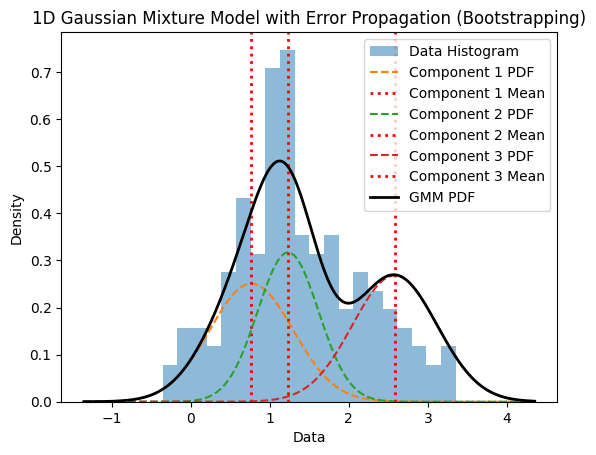

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from joblib import Parallel, delayed

# Define the function to apply constraints
def apply_constraints(means, stds, weights, mean_constraints, std_constraints):
    n_components = len(means)
    with torch.no_grad():
        for i in range(n_components):
            means[i].clamp_(mean_constraints[i][0], mean_constraints[i][1])
            stds[i].clamp_(std_constraints[i][0], std_constraints[i][1])
        weights.clamp_(min=0)
        weights /= weights.sum()

# Define the training loop for a single bootstrap sample
def train_gmm_single_sample(data, mean_constraints, std_constraints, n_epochs=500):
    n_components = len(mean_constraints)
    means = torch.tensor([0.5, 1.0, 3.0], requires_grad=True)
    stds = torch.tensor([0.9, 0.5, 0.3], requires_grad=True)
    weights = torch.tensor([1/3, 1/3, 1/3], requires_grad=True)
    
    optimizer = torch.optim.Adam([means, stds, weights], lr=0.001)
    
    for epoch in range(n_epochs):
        optimizer.zero_grad()

        log_likelihood = 0
        for x in data:
            mixture_prob = 0
            for j in range(n_components):
                weight = weights[j]
                mean = means[j]
                std = stds[j]
                mixture_prob += weight * torch.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))
            log_likelihood += torch.log(mixture_prob + 1e-10)

        loss = -log_likelihood.mean()
        
        loss.backward()
        optimizer.step()
        
        apply_constraints(means, stds, weights, mean_constraints, std_constraints)

    return means.detach().numpy(), stds.detach().numpy(), weights.detach().numpy()

# Function to perform a single bootstrap iteration
def bootstrap_iteration(i, X, mean_constraints, std_constraints):
    noisy_data = X + torch.randn(X.size()) * 0.1 * X  # Adding noise to simulate 10% uncertainty
    result = train_gmm_single_sample(noisy_data, mean_constraints, std_constraints)
    return result

if __name__ == "__main__":
    
    # Example 1D data (replace this with your actual 1D data)
    X = my_dataset.A

    # Convert the data to a PyTorch tensor
    X = torch.tensor(X, dtype=torch.float32)

    # Define constraints for each component
    mean_constraints = [(0.1, 2), (1, 3), (2, 4)]
    std_constraints = [(0.1, 2.5), (0.1, 2.5), (0.1, 2.5)]

    # Bootstrapping
    n_bootstrap_samples = 25

    results = []
    
    for i in range(n_bootstrap_samples):
        
        result = bootstrap_iteration(i, X, mean_constraints, std_constraints)
        results.append(result)
        
        # Print update every iteration
        if (i + 1) % 1 == 0 or i == n_bootstrap_samples - 1:
            print(f"Bootstrap iteration {i + 1} out of {n_bootstrap_samples} completed.")
    
    # Collect the results
    bootstrap_means, bootstrap_stds, bootstrap_weights = zip(*results)

    # Convert to numpy arrays for easier manipulation
    bootstrap_means = np.array(bootstrap_means)
    bootstrap_stds = np.array(bootstrap_stds)
    bootstrap_weights = np.array(bootstrap_weights)

    # Calculate the mean and standard deviation of the bootstrap results
    mean_means = np.mean(bootstrap_means, axis=0)
    std_means = np.std(bootstrap_means, axis=0)

    mean_stds = np.mean(bootstrap_stds, axis=0)
    std_stds = np.std(bootstrap_stds, axis=0)

    mean_weights = np.mean(bootstrap_weights, axis=0)
    std_weights = np.std(bootstrap_weights, axis=0)

    # Print the results
    print("\nBootstrap Results:")
    print("\nMeans:")
    print("Optimized Means:", mean_means)
    print("Standard Deviations of Means:", std_means)

    print("\nStandard Deviations:")
    print("Optimized Stds:", mean_stds)
    print("Standard Deviations of Stds:", std_stds)

    print("\nWeights:")
    print("Optimized Weights:", mean_weights)
    print("Standard Deviations of Weights:", std_weights)

    # Plot the bootstrap results
    x_values = np.linspace(X.min() - 1, X.max() + 1, 1000)

    # Plot the data histogram
    plt.hist(X.numpy(), bins=20, density=True, alpha=0.5, label='Data Histogram')

    # Plot each Gaussian component using the norm.pdf function with mean and std from bootstrap means
    for i in range(len(mean_constraints)):
        mean = mean_means[i]
        std_dev = mean_stds[i]
        weight = mean_weights[i]
        
        # Calculate the Gaussian component's PDF
        component_pdf = weight * norm.pdf(x_values, loc=mean, scale=std_dev)
        
        # Plot the component's PDF
        plt.plot(x_values, component_pdf, '--', label=f'Component {i + 1} PDF')
        plt.axvline(mean, color='red', linestyle=':', linewidth=2, label=f'Component {i + 1} Mean')

    # Plot the overall GMM PDF
    overall_pdf = np.sum([mean_weights[i] * norm.pdf(x_values, mean_means[i], mean_stds[i]) for i in range(len(mean_constraints))], axis=0)

    plt.plot(x_values, overall_pdf, '-k', label='GMM PDF', linewidth=2)

    # Add plot details
    plt.title('1D Gaussian Mixture Model with Error Propagation (Bootstrapping)')
    plt.xlabel('Data')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


### How to reconstruct a sample from a PDF (utile per il seguente P-P plot)

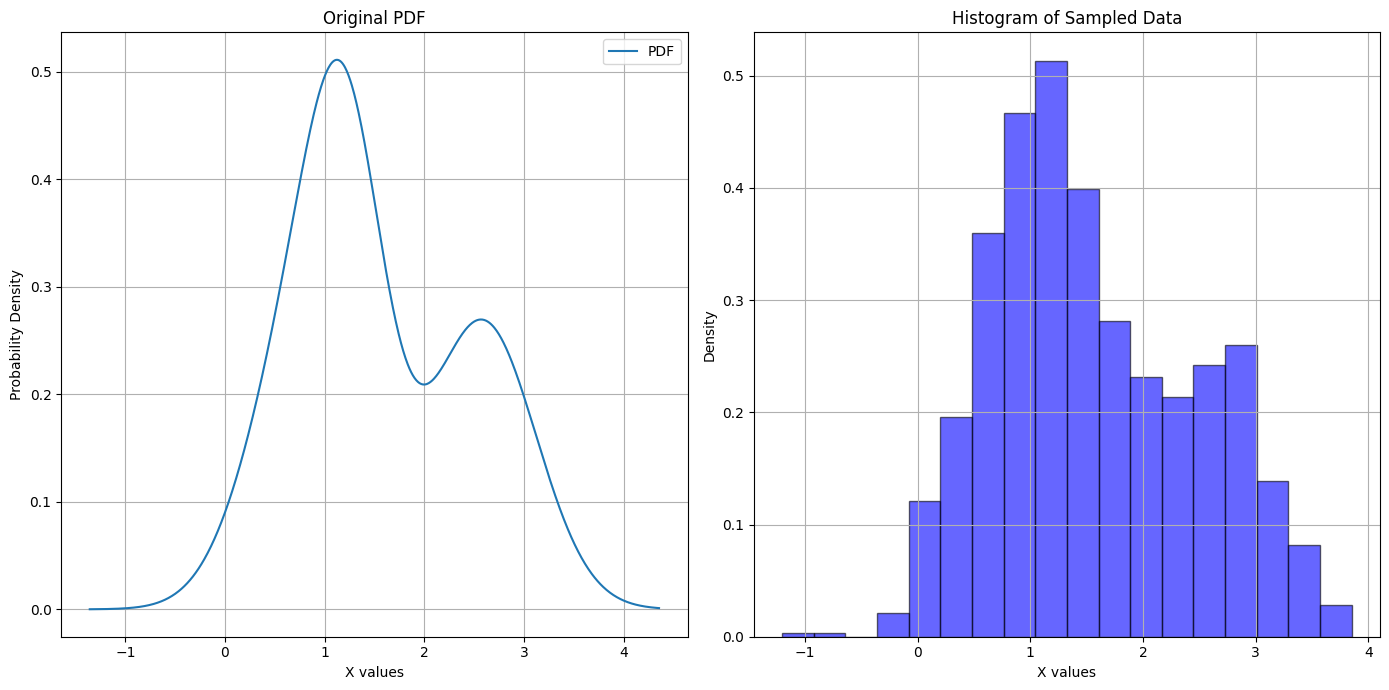

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Generate n samples from the PDF
sampled_data = PyCO2.Stats.sample_from_pdf(x_values, overall_pdf, n_samples=1000)

# Plot the original PDF and the histogram of the sampled data
plt.figure(figsize=(14, 7))

# Plot the original PDF
plt.subplot(1, 2, 1)
plt.plot(x_values, overall_pdf, label='PDF')
plt.title('Original PDF')
plt.xlabel('X values')
plt.ylabel('Probability Density')
plt.grid()
plt.legend()

# Plot the histogram of the sampled data
plt.subplot(1, 2, 2)
plt.hist(sampled_data, bins='auto', density=True, alpha=0.6, color='blue', edgecolor='black')
plt.title('Histogram of Sampled Data')
plt.xlabel('X values')
plt.ylabel('Density')
plt.grid()

plt.tight_layout()
plt.show()

### Percentile-Percentile plot (P-P plot) comparing the observed data with a custom distribution (da Verificare)

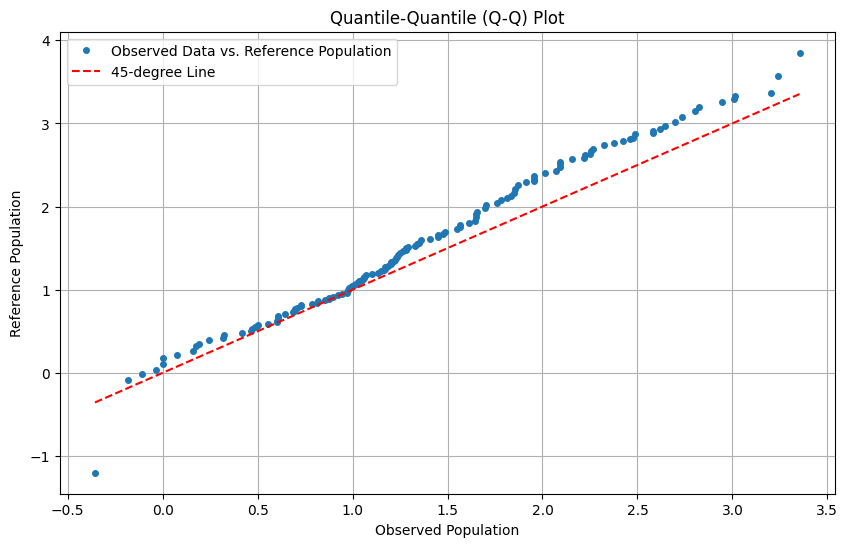

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Example observed data
observed_data = my_dataset.A

# Use identical data for reference population to test alignment
reference_population = sampled_data # if you put observed_data, data should lie in the 45 degree line


fig, ax = plt.subplots(figsize=(10, 6)) 

PyCO2.Visualize.qq_plot(ax, observed_data, reference_population)

# Labeling and formatting
ax.set_xlabel('Observed Population')
ax.set_ylabel('Reference Population')
ax.set_title('Quantile-Quantile (Q-Q) Plot')
ax.legend()
ax.grid(True)
plt.show()


### Normal and Lognormal Distributions...

Transformed Normal Distribution:
Mean (ln): 0.97737
Standard Deviation (ln): 0.49352

Lognormal Distribution Derived from Transformed Normal:
Mean: 3.00162
Mode: 2.08301
Standard Deviation: 1.57629

Direct Calculation from Original Lognormal Distribution:
Mean: 3.00302
Mode: 2.11700
Standard Deviation: 1.57465


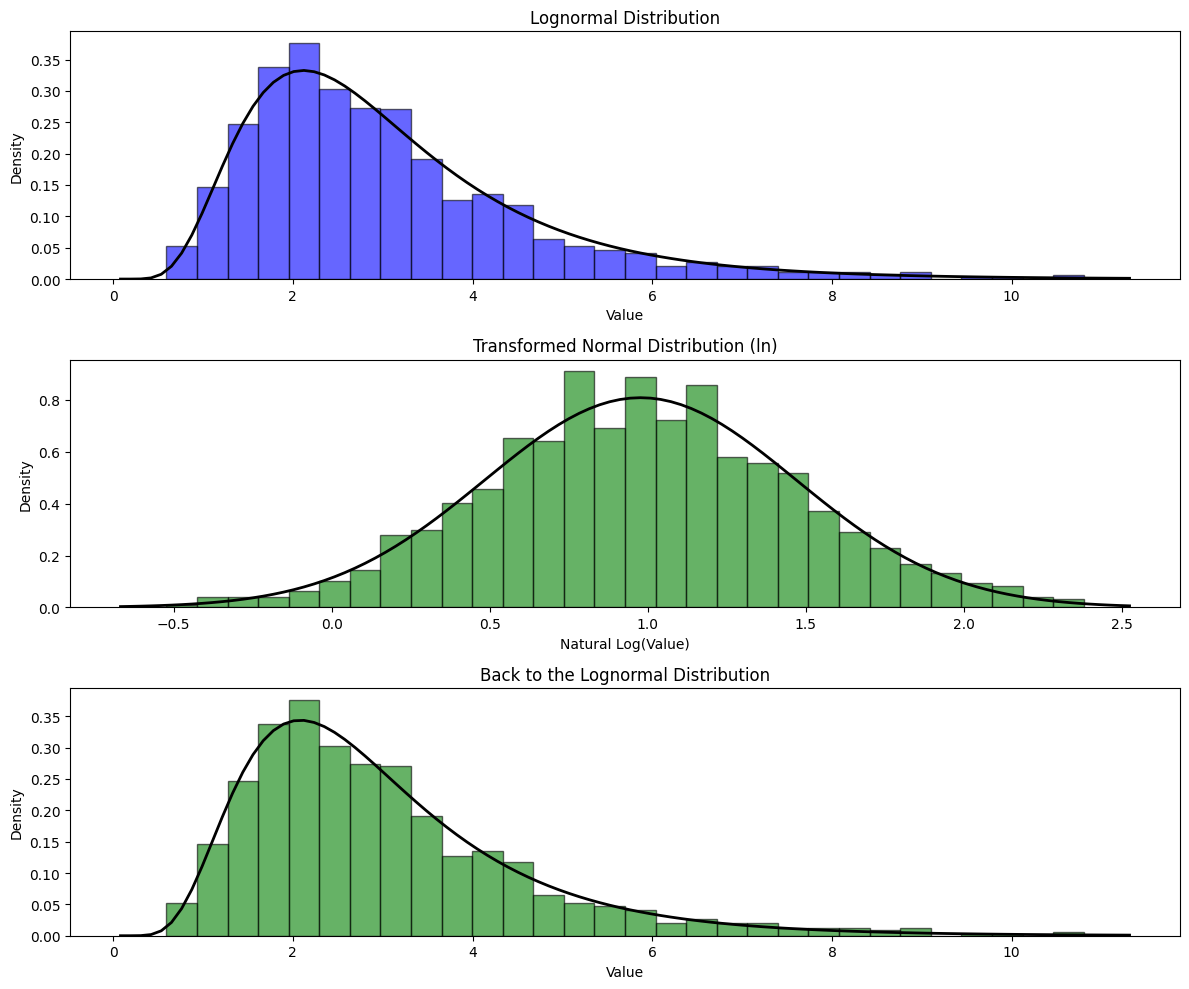

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Step 1: Generate a lognormal distribution
np.random.seed(0)  # For reproducibility
mean_log = 1.0  # Mean of the underlying normal distribution (log scale)
std_log = 0.5  # Standard deviation of the underlying normal distribution (log scale)
size = 1000    # Number of samples

# Generate lognormal data
lognormal_data = np.random.lognormal(mean_log, std_log, size)

# Step 2: Transform to a normal distribution using natural log
log_transformed_data = np.log(lognormal_data)

# Compute the mean and standard deviation of the transformed data (normal distribution)
mean_transformed = np.mean(log_transformed_data)
std_transformed = np.std(log_transformed_data)

# Step 3: Retrieve the mean, mode, and standard deviation of the original lognormal distribution
# For natural log transformation
mean_lognormal_from_transformed = np.exp(mean_transformed + 0.5 * std_transformed**2)
mode_lognormal_from_transformed = np.exp(mean_transformed - std_transformed**2)
std_lognormal_from_transformed = np.sqrt((np.exp(std_transformed**2) - 1) * np.exp(2 * mean_transformed + std_transformed**2))

# Step 4: Calculate mean, mode, and standard deviation directly from the original lognormal data
mean_lognormal_direct = np.mean(lognormal_data)
mode_lognormal_direct = np.exp(mean_log - std_log**2)  # Mode formula for lognormal distribution
std_lognormal_direct = np.std(lognormal_data)

# Step 5: Transform back the normal distribution to the lognormal one using exp
back_to_lognormal_data = np.exp(log_transformed_data)

# Print the results
print("Transformed Normal Distribution:")
print(f"Mean (ln): {mean_transformed:.5f}")
print(f"Standard Deviation (ln): {std_transformed:.5f}")

print("\nLognormal Distribution Derived from Transformed Normal:")
print(f"Mean: {mean_lognormal_from_transformed:.5f}")
print(f"Mode: {mode_lognormal_from_transformed:.5f}")
print(f"Standard Deviation: {std_lognormal_from_transformed:.5f}")

print("\nDirect Calculation from Original Lognormal Distribution:")
print(f"Mean: {mean_lognormal_direct:.5f}")
print(f"Mode: {mode_lognormal_direct:.5f}")
print(f"Standard Deviation: {std_lognormal_direct:.5f}")

# Plot the original lognormal and transformed normal distributions
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

# Original Lognormal Distribution
ax[0].hist(lognormal_data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')
xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, std_log, scale=np.exp(mean_log))
ax[0].plot(x, p, 'k', linewidth=2)
ax[0].set_title('Lognormal Distribution')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Density')

# Transformed Normal Distribution
ax[1].hist(log_transformed_data, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
xmin, xmax = ax[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_transformed, std_transformed)
ax[1].plot(x, p, 'k', linewidth=2)
ax[1].set_title('Transformed Normal Distribution (ln)')
ax[1].set_xlabel('Natural Log(Value)')
ax[1].set_ylabel('Density')

#  Logormal Distribution From the Normal one
ax[2].hist(back_to_lognormal_data, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
xmin, xmax = ax[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, np.std(np.log(back_to_lognormal_data)), scale=np.exp(np.mean(np.log(back_to_lognormal_data))))
ax[2].plot(x, p, 'k', linewidth=2)
ax[2].set_title('Back to the Lognormal Distribution')
ax[2].set_xlabel('Value')
ax[2].set_ylabel('Density')

plt.tight_layout()
plt.show()


### Minimum Variances Unbiased Estimator (MVUE) - da verificare 
form 10.1016/j.ijggc.2016.02.012

In [16]:
import pyco2stats as PyCO2
import numpy as np


# Example usage
data = np.random.lognormal(mean=1, sigma=0.5, size=1000)

mvue_mean, mvue_ci_lower, mvue_ci_upper  = PyCO2.Stats.mvue_lnorm_dist(data, confidence=0.95, sighel="chatGPT")

print(f"MVUE Mean: {mvue_mean:.5f}")
print(f"95% Confidence Interval: {mvue_ci_lower}, {mvue_ci_upper}")

mvue_mean, mvue_ci_lower, mvue_ci_upper  = PyCO2.Stats.mvue_lnorm_dist(data, confidence=0.95, sighel="MP")

print(f"MVUE Mean: {mvue_mean:.5f}")
print(f"95% Confidence Interval: {mvue_ci_lower}, {mvue_ci_upper}")


MVUE Mean: 3.07702
95% Confidence Interval: 2.9859173413702074, 3.170901531024208
MVUE Mean: 3.07702
95% Confidence Interval: 2.9859173413702074, 3.170901531024208


In [17]:
import numpy as np
import scipy.stats as stats
import scipy.special as sp

def sichel_function(sigma_sq, n, max_terms=15, tol=1e-10):
    """Compute Sichel's function ψ_n using logarithmic space for stability."""
    psi_n = 1 + (n - 1) / n * sigma_sq  # Start with the first two terms

    for j in range(2, max_terms + 1):
        # Calculate the logarithm of the numerator and denominator
        log_numerator = (2 * j - 1) * np.log(n - 1)
        log_denominator = j * np.log(n) + np.sum(np.log(np.arange(n + 1, n + 2 * j, 2)))
        
        # Compute the term in logarithmic space
        log_term = log_numerator - log_denominator + j * np.log(sigma_sq) - sp.gammaln(j + 1)
        
        # Convert back to original space
        term = np.exp(log_term)
        
        psi_n += term
        
        # Break if the term is very small
        if term < tol:
            break
    
    return psi_n

def mvue_lognormal(data, confidence=0.95):
    """
    Calculate the MVUE for the mean and confidence interval for log-normally distributed data using Sichel's function.
    
    Parameters:
    data (array-like): Log-normally distributed data.
    confidence (float): Confidence level for the interval. Default is 0.95.
    
    Returns:
    dict: A dictionary containing the MVUE mean and confidence interval.
    """
    # Step 1: Transform the data using the natural log
    log_data = np.log(data)
    
    # Step 2: Calculate the sample mean and variance of the log-transformed data
    n = len(log_data)
    sample_mean_log = np.mean(log_data)
    sample_variance_log = np.var(log_data, ddof=1)  # Using unbiased estimator with ddof=1
    
    # Step 3: Calculate Sichel's function ψ_n
    psi_n = sichel_function(0.5 * sample_variance_log, n)
    
    # Step 4: Estimate the mean of the log-normal distribution using MVUE
    mvue_mean = np.exp(sample_mean_log) * psi_n
    
    # Step 5: Calculate the confidence interval for the mean of the log-normal distribution
    t_alpha_2 = stats.t.ppf(1 - (1 - confidence) / 2, df=n-1)
    ci_lower_log = sample_mean_log - t_alpha_2 * np.sqrt(sample_variance_log / n)
    ci_upper_log = sample_mean_log + t_alpha_2 * np.sqrt(sample_variance_log / n)
    
    mvue_ci_lower = np.exp(ci_lower_log) * psi_n
    mvue_ci_upper = np.exp(ci_upper_log) * psi_n
    
    return {
        'MVUE Mean': mvue_mean,
        'Confidence Interval': (mvue_ci_lower, mvue_ci_upper)
    }


result = mvue_lognormal(data, confidence=0.95)
print(f"MVUE Mean: {result['MVUE Mean']:.5f}")
print(f"95% Confidence Interval: {result['Confidence Interval']}")


MVUE Mean: 3.05754
95% Confidence Interval: (np.float64(2.967014209829349), np.float64(3.1508273086358027))


## Sigma Clipping

In [19]:
import pyco2stats as PyCO2
import numpy as np
import scipy.stats as stats
from astropy.stats import sigma_clipped_stats

rng = np.random.default_rng(0)
x = np.arange(200)
y = np.zeros(200)
c = stats.bernoulli.rvs(0.35, size=x.shape)
y += (rng.normal(0., 0.2, x.shape) + c * rng.normal(3.0, 5.0, x.shape))

sigma_clipped_statistics = sigma_clipped_stats(y, sigma=3, maxiters=10) 
print(sigma_clipped_statistics)
my_sigma_clipped_statistics = PyCO2.Stats.sigma_clipped_stats(y, sigma=3, maxiters=10) 
print(my_sigma_clipped_statistics)


(np.float64(-0.01569912071729637), np.float64(-0.02149869813551742), np.float64(0.20589534810706525))
(np.float64(-0.01569912071729637), np.float64(-0.02149869813551742), np.float64(0.20589534810706525))


### Biweight location

In [20]:
from astropy.stats import biweight_location

biweight_loc = biweight_location(y) 
print(biweight_loc)
my_biweight_loc = PyCO2.Stats.biweight_location(y)  
print(my_biweight_loc)

-0.006744134516079192
-0.006744134516079192


In [21]:
import scipy as sp
sp.__version__

'1.15.2'

In [23]:
import pyco2stats as PyCO2
import numpy as np
from scipy.stats import *
from astropy.stats import *
from scipy.stats.mstats import *
import statsmodels.api as sm


# Test the functions on lognormal distribution with added noise
np.random.seed(0)
data = np.random.lognormal(mean=0, sigma=1, size=1000)
noise = np.random.normal(0, 0.1, 1000)
data_with_noise = data + noise

# Testing Stats functions
print("Testing Stats functions with data_with_noise")

# Sample from PDF
x = np.linspace(min(data_with_noise), max(data_with_noise), 1000)
pdf = lognorm.pdf(x, s=1, scale=np.exp(0))
sampled_data = PyCO2.Stats.sample_from_pdf(x, pdf)
print("Sample from PDF:", sampled_data[:5])

# MVUE for log-normal distribution
mvue_mean, mvue_ci_lower, mvue_ci_upper = PyCO2.Stats.mvue_lnorm_dist(data_with_noise)
print("MVUE mean:", mvue_mean)
print("MVUE CI lower:", mvue_ci_lower)
print("MVUE CI upper:", mvue_ci_upper)

# Median
median = PyCO2.Stats.median(data_with_noise)
print("Median:", median)

# Median Absolute Deviation
mad = PyCO2.Stats.median_absolute_deviation(data_with_noise)
print("MAD:", mad)

# MAD standard deviation
my_mad_std = PyCO2.Stats.mad_std(data_with_noise)
print("MAD Std:", my_mad_std)

# Sigma clipping
sigma_clipped_data = PyCO2.Stats.sigma_clip(data_with_noise)
print("Sigma clipped data:", sigma_clipped_data[:5])

# Sigma clipped statistics
mean, median, stddev = PyCO2.Stats.sigma_clipped_stats(data_with_noise)
print("Sigma clipped stats - mean:", mean)
print("Sigma clipped stats - median:", median)
print("Sigma clipped stats - stddev:", stddev)

# Biweight location
biweight_loc = PyCO2.Stats.biweight_location(data_with_noise)
print("Biweight location:", biweight_loc)

# Biweight scale
biweight_scl = PyCO2.Stats.biweight_scale(data_with_noise)
print("Biweight scale:", biweight_scl)

# Trim
trimmed_data = PyCO2.Stats.trim(data_with_noise)
print("Trimmed data:", trimmed_data[:5])

# Trimmed mean
trimmed_mean = PyCO2.Stats.trimmed_mean(data_with_noise)
print("Trimmed mean:", trimmed_mean)

# Trimmed std
my_trimmed_std = PyCO2.Stats.trimmed_std(data_with_noise)
print("Trimmed std:", my_trimmed_std)

# Trim both
trimboth_data = PyCO2.Stats.trimboth(data_with_noise,proportiontocut=0.1)
print("Trim both data:", trimboth_data[:5])

# Trim tail
trimtail_data = PyCO2.Stats.trimtail(data_with_noise)
print("Trim tail data:", trimtail_data[:5])

# Winsorize
winsorized_data = PyCO2.Stats.winsorize(data_with_noise)
print("Winsorized data:", winsorized_data[:5])

# Winsorized mean
winsorized_mean = PyCO2.Stats.winsorized_mean(data_with_noise)
print("Winsorized mean:", winsorized_mean)

# Winsorized std
winsorized_std = PyCO2.Stats.winsorized_std(data_with_noise)
print("Winsorized std:", winsorized_std)

# Huber
huber_loc, huber_scl = PyCO2.Stats.Huber(data_with_noise)
print("Huber location:", huber_loc)
print("Huber scale:", huber_scl)

# Comparison with original functions
print("\nComparison with original functions")

# Biweight location comparison
biweight_loc_orig = biweight_location(data_with_noise)
print("Original Biweight location:", biweight_loc_orig)

# Biweight scale comparison
biweight_scl_orig = biweight_scale(data_with_noise)
print("Original Biweight scale:", biweight_scl_orig)

# MAD comparison
mad_orig = median_absolute_deviation(data_with_noise)
print("Original MAD:", mad_orig)

# MAD std comparison
mad_std_orig = mad_std(data_with_noise)
print("Original MAD Std:", mad_std_orig)

# Sigma clipping comparison
sigma_clipped_data_orig = sigma_clip(data_with_noise)
print("Original Sigma clipped data:", sigma_clipped_data_orig[:5])

# Sigma clipped stats comparison
mean_orig, median_orig, stddev_orig = sigma_clipped_stats(data_with_noise)
print("Original Sigma clipped stats - mean:", mean_orig)
print("Original Sigma clipped stats - median:", median_orig)
print("Original Sigma clipped stats - stddev:", stddev_orig)

# Trim comparison
trimmed_data_orig = trim(data_with_noise)
print("Original Trimmed data:", trimmed_data_orig[:5])

# Trimmed mean comparison
trimmed_mean_orig = tmean(data_with_noise)
print("Original Trimmed mean:", trimmed_mean_orig)

# Trimmed std comparison
trimmed_std_orig = trimmed_std(data_with_noise)
print("Original Trimmed std:", trimmed_std_orig)

# Trim both comparison
trimboth_data_orig = trimboth(data_with_noise)
print("Original Trim both data:", trimboth_data_orig[:5])

# Trim tail comparison
trimtail_data_orig = trimtail(data_with_noise)
print("Original Trim tail data:", trimtail_data_orig[:5])

# Winsorize comparison
winsorized_data_orig = winsorize(data_with_noise)
print("Original Winsorized data:", winsorized_data_orig[:5])

# Winsorized mean comparison
winsorized_mean_orig = np.mean(winsorize(data_with_noise))
print("Original Winsorized mean:", winsorized_mean_orig)

# Winsorized std comparison

winsorized_std_orig = np.std(winsorize(data_with_noise))
print("Original Winsorized std:", winsorized_std_orig)

# Huber comparison
huber_proposal_2 = sm.robust.Huber()
huber_loc_orig, huber_scl_orig = huber_proposal_2(data_with_noise)
print("Original Huber location:", huber_loc_orig)
print("Original Huber scale:", huber_scl_orig)

Testing Stats functions with data_with_noise
Sample from PDF: [0.76759802 0.79928153 0.27650358 1.05274963 0.27650358]
MVUE mean: nan
MVUE CI lower: nan
MVUE CI upper: nan
Median: 0.9513790370524534
MAD: 0.5366837332111185
MAD Std: 0.795688493494673
Sigma clipped data: [-- 1.581306632135118 2.618864294316274 -- --]
Sigma clipped stats - mean: 1.0229583999739713
Sigma clipped stats - median: 0.818415792080579
Sigma clipped stats - stddev: 0.7279200271636502
Biweight location: 0.9595000205595372
Biweight scale: 0.8823855038845202
Trimmed data: [5.89163546 1.58130663 2.61886429 9.41219655 6.49527658]
Trimmed mean: 1.5574020975158651
Trimmed std: 0.7439854564146288
Trim both data: [0.25672823 0.25714519 0.25809191 0.25995627 0.26805076]
Trim tail data: [5.891635458634949 1.581306632135118 2.618864294316274 9.412196554529404
 6.495276578536528]
Winsorized data: [5.89163546 1.58130663 2.61886429 9.41219655 6.49527658]
Winsorized mean: 1.5574020975158651
Winsorized std: 1.8664321759647031
Hub

C:\Users\mbaro\miniconda3\envs\pyco2\Lib\site-packages\pyco2stats\stats.py:156: RuntimeWarning: invalid value encountered in log
  log_data = np.log(data)


### Gaussian Mixtutre Method (GMM) fitted using the Maximum Likelihood (ML) method
form 10.1016/j.ijggc.2016.02.012

Estimated Means: [2.03557037 7.9596912  4.96374573]
Estimated Standard Deviations: [0.51094143 0.74275407 0.27541228]
Estimated Weights: [0.40002132 0.25056201 0.34941667]


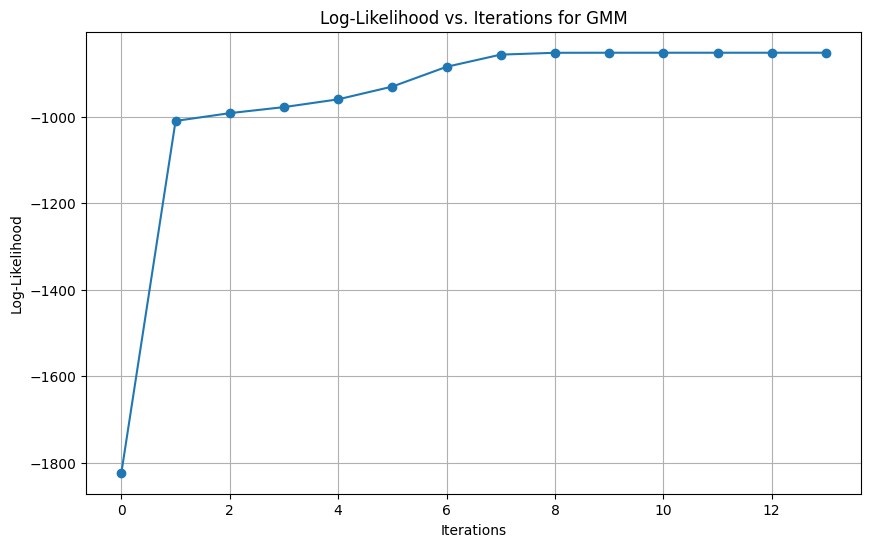

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data for demonstration
np.random.seed(0)
n_samples = 500
means = [2, 5, 8]
std_devs = [0.5, 0.3, 0.7]
weights = [0.4, 0.35, 0.25]

data = np.concatenate([np.random.normal(m, s, int(w * n_samples))
                       for m, s, w in zip(means, std_devs, weights)])

# Fit GMM using EM algorithm
n_components = 3
means, std_devs, weights, log_likelihoods = PyCO2.GMM.gaussian_mixture_em(data, n_components)

# Print the estimated parameters
print("Estimated Means:", means)
print("Estimated Standard Deviations:", std_devs)
print("Estimated Weights:", weights)

# Plot log-likelihood vs. iterations
plt.figure(figsize=(10, 6))
plt.plot(log_likelihoods, marker='o')
plt.title('Log-Likelihood vs. Iterations for GMM')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()


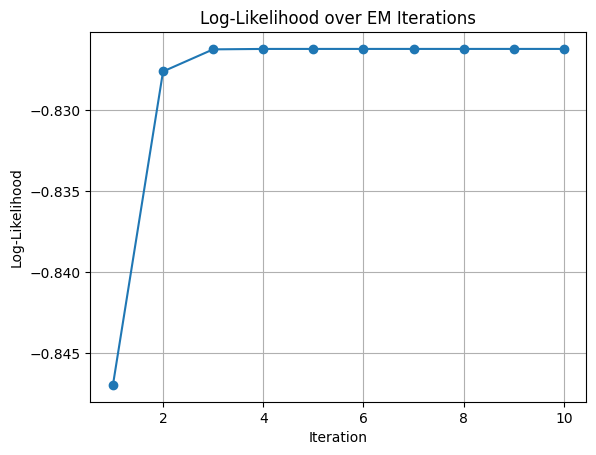


Optimized Means (original scale):
 [2.03557036 7.95969216 4.96374601]

Optimized Standard Deviations (original scale):
 [0.51094706 0.74275673 0.27542317]

Optimized Weights:
 [0.40002132 0.25056189 0.34941679]


In [25]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# Generate synthetic data
X = data

X = X.reshape(-1, 1)  # Reshape for sklearn, which expects 2D array

original_means, original_std_devs, weights, max_iter, log_likelihoods = PyCO2.GMM.gaussian_mixture_sklearn(X, n_components = 3, max_iter = 10, tol = 1e-10, n_init = 20, suppress_warnings= True  )

# Plot the log-likelihood over iterations
plt.plot(range(1, max_iter + 1), log_likelihoods, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood over EM Iterations')
plt.grid(True)
plt.show()

# Print the optimized parameters
print("\nOptimized Means (original scale):\n", original_means)
print("\nOptimized Standard Deviations (original scale):\n", original_std_devs)
print("\nOptimized Weights:\n", weights)
